<a href="https://colab.research.google.com/github/PinkOrangeSapphire/229352/blob/main/Lab07_Boosted_trees.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Statistical Learning for Data Science 2 (229352)
#### Instructor: Donlapark Ponnoprat

#### [Course website](https://donlapark.pages.dev/229352/)

## Lab #6

## Boosted tree models on a simulated dataset

- [AdaBoostClassifier documentation](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html#sklearn-ensemble-adaboostclassifier)
- [XGBClassifier documentation](https://xgboost.readthedocs.io/en/stable/python/python_api.html#xgboost.XGBClassifier)
- [LGBMClassifier documentation](https://lightgbm.readthedocs.io/en/latest/pythonapi/lightgbm.LGBMClassifier.html#lightgbm-lgbmclassifier)
- [GridSeachCV documentation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)


- [Data](https://github.com/donlapark/ds352-labs/raw/main/Lab06-data.zip)


Perform GridSearchCV of the following three models on the provided training set (`X_train.csv` and `y_train.csv`)

1. Evaluate these models on the test set (`X_test.csv` and `y_test.csv`). **Keep searching (using cross-validation) until you find the model that achieves > 0.83 out-of-fold accuracy (use `GridSeachCV.best_score_` to obtain the out-of-fold accuracy)**

2. Report the test accuracy of your best model.

3. For each model, plot the feature importances

For `AdaBoostClassifier`, feature importances can be obtained by calling the `feature_importances_` attribute after fitting the model.

For `XGBClassifier` and `LGBMClassifier`, feature importances can be obtained using the library’s `plot_importance` function. Here is a minimal example in XGBoost:

In [1]:
from sklearn import datasets


iris = datasets.load_iris()
X = iris.data
y = iris.target

In [2]:
from sklearn.ensemble import AdaBoostClassifier


ab = AdaBoostClassifier()
ab.fit(X, y)
ab.feature_importances_

array([0.        , 0.05832968, 0.39621104, 0.54545929])

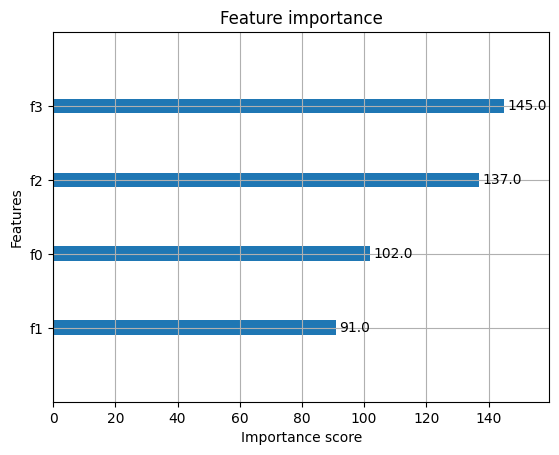

In [3]:
from xgboost import XGBClassifier, plot_importance


model = XGBClassifier()
model.fit(X, y)
plot_importance(model);

In [4]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

/usr/local/lib/python3.12/dist-packages/xgboost/plotting.py:267: FutureWarning: The `num_trees` parameter is deprecated, use `tree_idx` insetad. 
  warnings.warn(


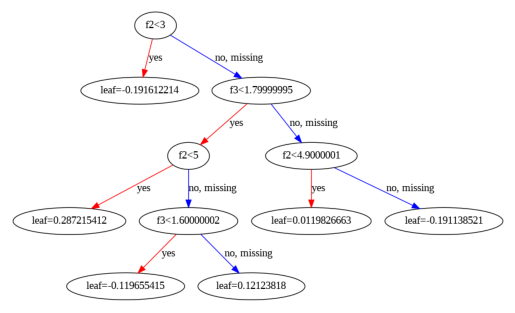

In [5]:
from xgboost import plot_tree

plot_tree(model, num_trees=4);

In [10]:
import pandas as pd

X_test = pd.read_csv('X_test.csv', header=None)
y_test = pd.read_csv('y_test.csv', header=None)
X_train = pd.read_csv('X_train.csv', header=None)
y_train = pd.read_csv('y_train.csv', header=None)


# **Adaboost model**

In [11]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier
import matplotlib.pyplot as plt

ab = AdaBoostClassifier()

param_Adaboost = {'n_estimators': [10, 50, 100],
                  'learning_rate':[0.01, 0.1, 1.0]}

grid_Adaboost = GridSearchCV(ab, param_Adaboost, cv=5, scoring='accuracy' ,n_jobs=-1)
grid_Adaboost.fit(X_train, y_train.values.ravel())

GridSearchCV(cv=5, estimator=AdaBoostClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 1.0],
                         'n_estimators': [10, 50, 100]},
             scoring='accuracy')

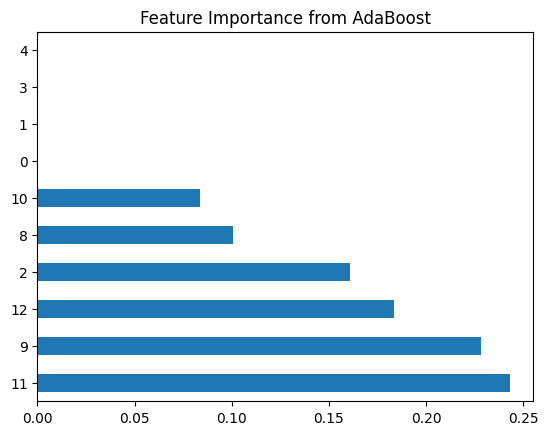

AdaBoost Best CV Score: 0.8442


In [13]:
best_model = grid_Adaboost.best_estimator_
importances = best_model.feature_importances_
feature_names = X_train.columns

feat_importances = pd.Series(importances, index=feature_names)

feat_importances.nlargest(10).plot(kind='barh')
plt.title('Feature Importance from AdaBoost')
plt.show()
print(f"AdaBoost Best CV Score: {grid_Adaboost.best_score_:.4f}")

In [14]:
from sklearn.metrics import classification_report
# Evaluate Adaboost model
y_pred = grid_Adaboost.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.89      0.76      0.82        41
         1.0       0.82      0.92      0.87        50

    accuracy                           0.85        91
   macro avg       0.85      0.84      0.84        91
weighted avg       0.85      0.85      0.84        91



# **XGboost model**

XGBoost Best CV Score: 0.8348


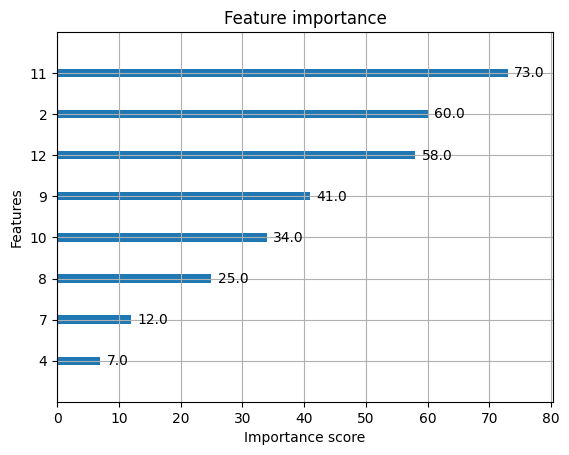

In [16]:
from xgboost import XGBClassifier, plot_importance
from sklearn.model_selection import GridSearchCV

xg = XGBClassifier()

param_XGboost = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.3],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0]} #  RNG t train

grid_XGboost = GridSearchCV(xg, param_XGboost, cv=5, scoring='accuracy',n_jobs=-1)
grid_XGboost.fit(X_train, y_train.values.ravel())

plot_importance(grid_XGboost.best_estimator_);
print(f"XGBoost Best CV Score: {grid_XGboost.best_score_:.4f}")

In [17]:
y_pred_xg = grid_XGboost.predict(X_test)

print(classification_report(y_test, y_pred_xg))

              precision    recall  f1-score   support

         0.0       0.89      0.76      0.82        41
         1.0       0.82      0.92      0.87        50

    accuracy                           0.85        91
   macro avg       0.85      0.84      0.84        91
weighted avg       0.85      0.85      0.84        91



# **LGBMClassifier**

Fitting 5 folds for each of 108 candidates, totalling 540 fits
LightGBM Best CV Score: 0.8302


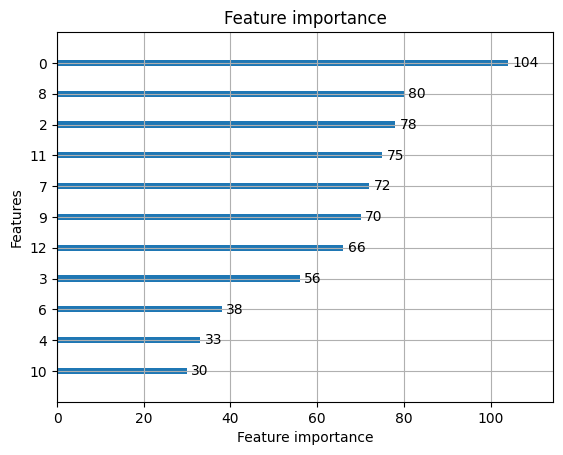

In [18]:
from lightgbm import LGBMClassifier, plot_importance

lgbm = LGBMClassifier(verbosity=-1)

paran_LGBM = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.05],
    'num_leaves': [31, 64, 100],
    'max_depth': [-1, 15],
    'min_child_samples': [10, 20, 50]
}

grid_LGBM = GridSearchCV(lgbm, paran_LGBM, cv=5, scoring='accuracy',verbose=1 )
grid_LGBM.fit(X_train, y_train.values.ravel())

plot_importance(grid_LGBM.best_estimator_)
print(f"LightGBM Best CV Score: {grid_LGBM.best_score_:.4f}")

In [19]:
y_pred_lgbm = grid_LGBM.predict(X_test)

print(classification_report(y_test, y_pred_lgbm))

              precision    recall  f1-score   support

         0.0       0.80      0.80      0.80        41
         1.0       0.84      0.84      0.84        50

    accuracy                           0.82        91
   macro avg       0.82      0.82      0.82        91
weighted avg       0.82      0.82      0.82        91



จากโมเดลทั้ง 3 ประเภท what we got are

AdaBoost Classifier best CV Score = 0.8442

XGBoost Classifier best CV Score = 0.8348

LGBM Classifier best CV Score = 0.8302

สรุปผลพบว่า โมเดลทั้ง 3 ตัวสามารถทำคะแนนได้สูงกว่าเกณฑ์ที่ตั้งไว้ (มากกว่า 0.83) ทุกโมเดล แต่เมื่อเปรียบเทียบกันแล้ว AdaBoost Classifier ให้ผลการทำงานดีที่สุด โดยมีค่าเฉลี่ยความแม่นยำ (CV Score) เท่ากับ 84.42% ดังนั้นจึงถือว่าเป็นโมเดลที่เหมาะสมที่สุด